# Quiz 03
## Background: Evaluating Current Extreme Snowfall in the Sierras

The snowpack in the Sierra Nevada mountains has reached record-breaking levels as a result of a series of atmospheric river events. 


<figure>
<img src="img/daniel-swain-tweet.png" width="400"/>
</figure>

<figure>
<img src="img/march-12-2023-snowpack.jpeg" width="400"/>
</figure>


Over the past few weeks you have been building up your skills in geospatial analysis. We can now use those skills to see for ourselves this historic event and try to quantify the magntiude relative to other years.

For this quiz you will be calculating the Normalized Difference Snow Index (NDSI) using Sentinel-2 data. The NDSI is an index that is related to the presence of snow in a pixel and is a more accurate description of snow detection as compared to Fractional Snow Cover (FSC). Snow typically has very high visible (VIS) reflectance and very low reflectance in the shortwave infrared (SWIR), a characteristic used to detect snow by distinguishing between snow and most cloud types. 


The NDSI is calculated as follows:

(Green - SWIR) / (Green + SWIR)




Where values above 0.42 indicate snow. Recall the Sentinel-2 bands are as follows:

<figure>
<img src="img/sentinel-2-bands.jpg" width="400"/>
</figure>



Answer the following questions to perform a snow area comparison for the past few years in the Tuolumne watershed (```data/tuolumne-watershed.geojson```) ([source](https://geodata.lib.berkeley.edu/catalog/stanford-yt364hw9952)).




## Questions

1. Load and mask the correct Sentinel-2 bands (hint, as there are many SWIR bands use band 11) to calculate NDSI for March 12th, 2021, 2022 and 2023. All files are located under the ```data``` folder. 
2. Calculate NDSI for each year and save as intermediate outputs.
3. Show that the spatial extent, CRS and resolution is the same for all three years. 
4. Reclassify each NDSI year as follows:
- < 0.42: no snow
- $\gt$ 0.42: snow
5. Create three subplots in one figure (1 row with 3 columns) depicting your classified snow data using: ```colors = ['grey', 'cyan', 'black']```. Write 1-2 sentences of patterns you observe.
6. Create three subplots in one figure (1 row with 3 columns) depicting histograms of your classified snow data. 
7. Given that the CRS is a projected coordinate reference system in meters, use the pixel resolution and information from your histograms to estimate the **total area of snow** (i.e. number of pixels in each bin * pixel area) for each year. 

To give you an idea of the type of results you should see, review the RGB + NDSI applied masks below:

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import seaborn as sns
import rioxarray as rxr
import xarray as xr
import geopandas as gpd
from PIL import Image


(-0.5, 1371.5, 709.5, -0.5)

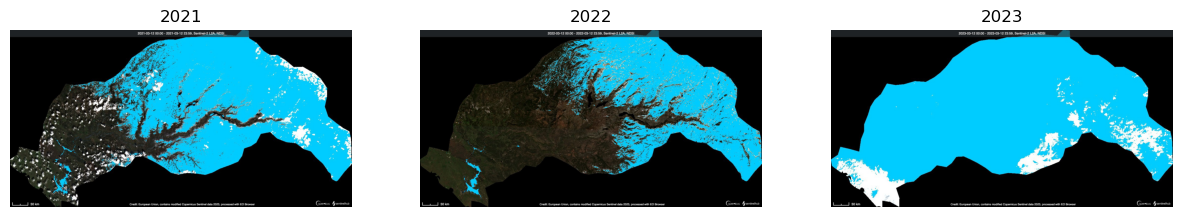

In [16]:
f, axs = plt.subplots(1,3, figsize=(15, 15))

axs[0].imshow(np.asarray(Image.open('img/2021-03-12-00_00_2021-03-12-23_59_Sentinel-2_L2A_NDSI.jpg')))
axs[0].title.set_text('2021')
axs[0].axis('off')
axs[1].imshow(np.asarray(Image.open('img/2022-03-12-00_00_2022-03-12-23_59_Sentinel-2_L2A_NDSI.jpg')))
axs[1].title.set_text('2022')
axs[1].axis('off')
axs[2].imshow(np.asarray(Image.open('img/2023-03-12-00_00_2023-03-12-23_59_Sentinel-2_L2A_NDSI.jpg')))
axs[2].title.set_text('2023')
axs[2].axis('off')


